In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.options.mode.chained_assignment = None
#Считывание файла и вывод первых 5 строк
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 22})
df = pd.read_csv('real_estate_data.csv')

df.head(5)

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [94]:
#Выведем информацию о столбцах
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

In [95]:
#удалим столбцы, которые не будут использоваться в дальнейшем анализе
df.drop(['airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

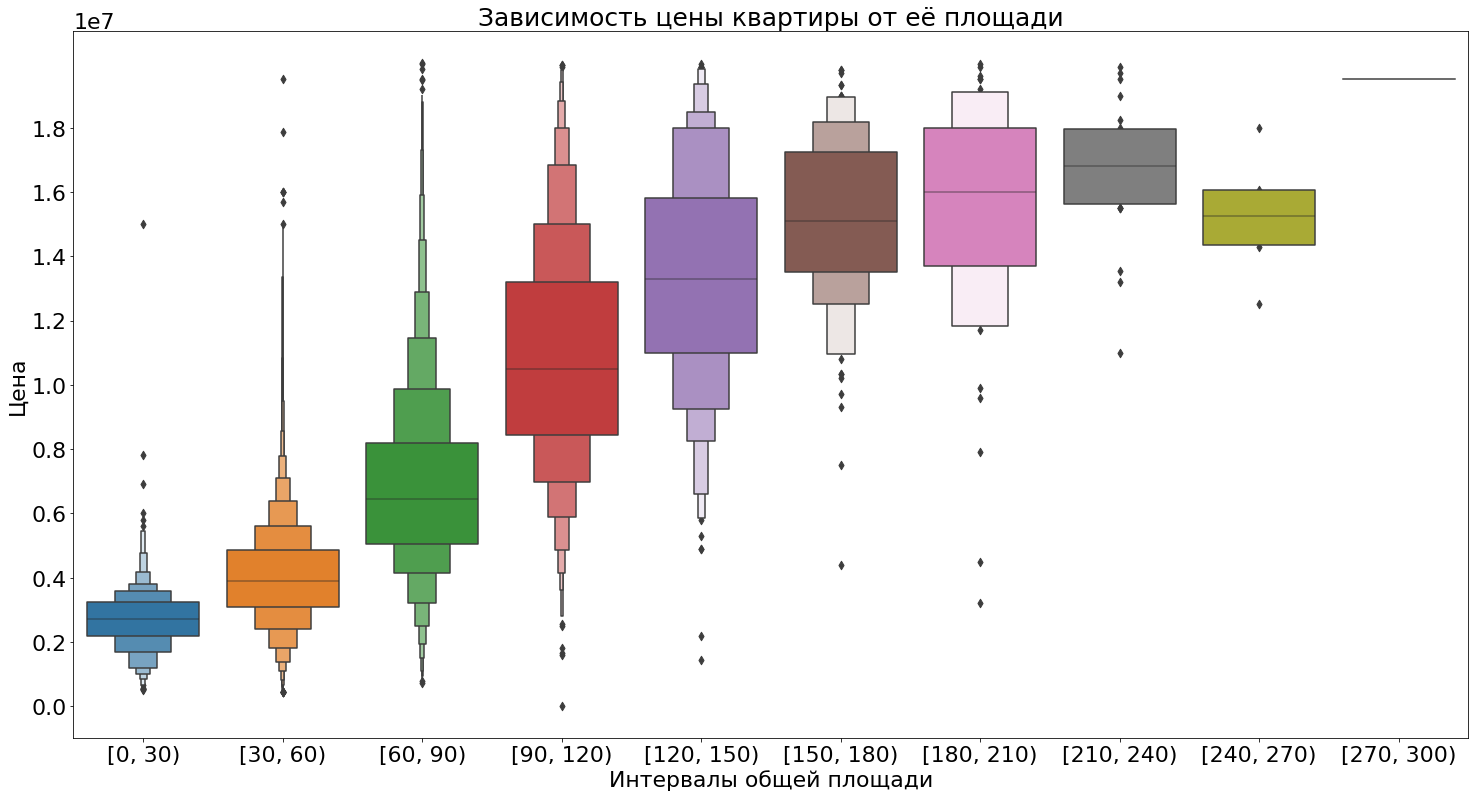

In [96]:
#Избавимся от выбросов в данных
df = df.query("total_area < 300 and last_price < 2e+7 ")

#Разобьем значения общей площади на интервалы

my_list = []
for i in range(0, 10):
    my_df = pd.DataFrame(df.query("total_area >= @i*30 and total_area < (@i+1)*30").last_price)
    
    my_df['total_area_interval'] = '[' + str(i*30) + ', ' + str((i+1)*30) + ')'
    my_list.append(my_df)
    
result = pd.concat(my_list)


fig, ax = plt.subplots(figsize = (25,13))
sns.boxenplot(x = result.total_area_interval, y = result.last_price)
ax.set_title("Зависимость цены квартиры от её площади", size = 25)
ax.set(xlabel="Интервалы общей площади", ylabel="Цена")
plt.yticks(np.arange(0, 20e6, step = 2e6))

plt.show()

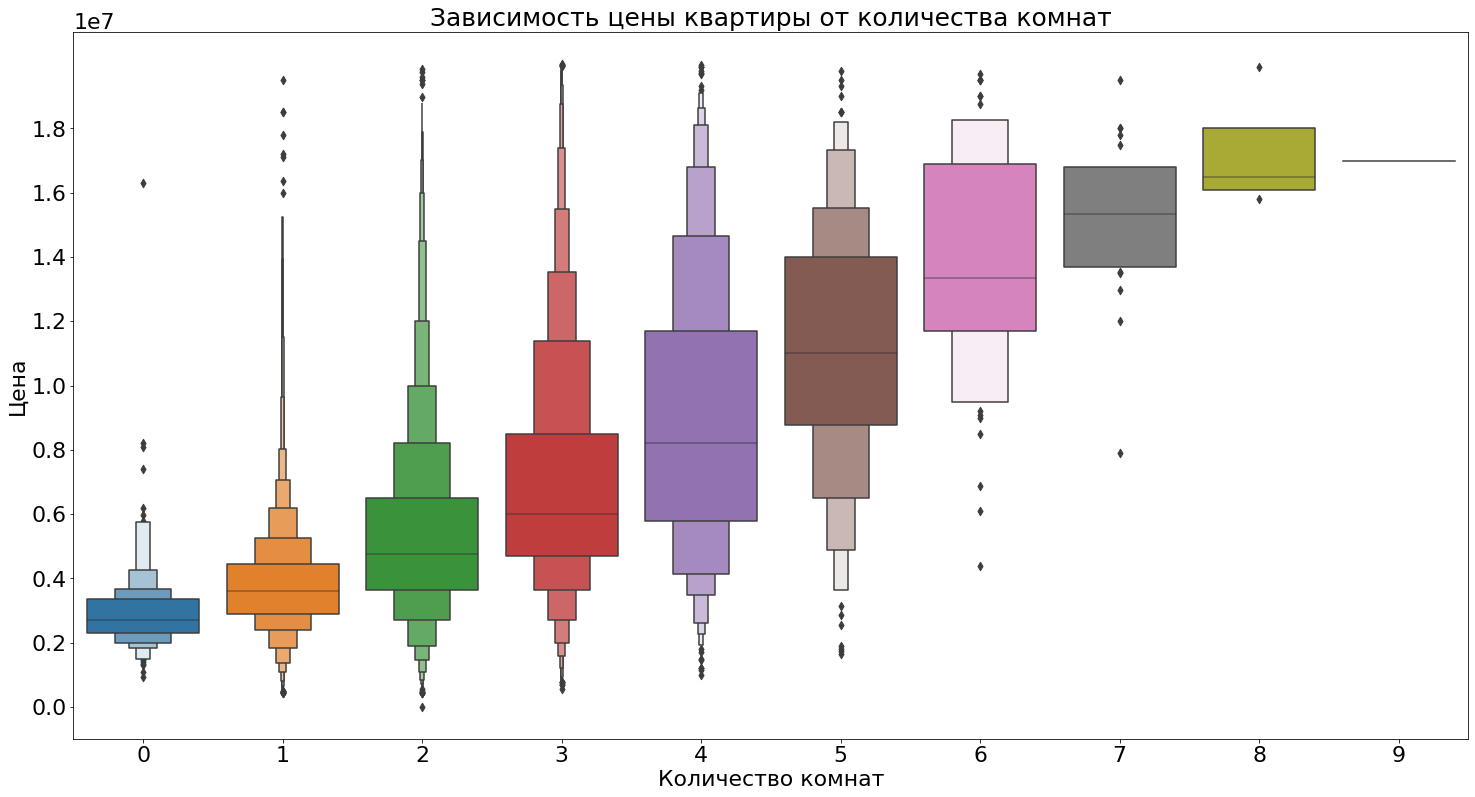

In [97]:
#Избавимся от выбросов в данных
df = df.query("rooms < 10")


fig, ax = plt.subplots(figsize = (25,13))
plt.xticks(np.arange(0, 10, step = 1))
plt.yticks(np.arange(0, 20e6, step = 2e6))
sns.boxenplot(x = df.rooms, y = df.last_price)

ax.set_title("Зависимость цены квартиры от количества комнат", size = 25)
ax.set(xlabel="Количество комнат", ylabel="Цена")
plt.show()

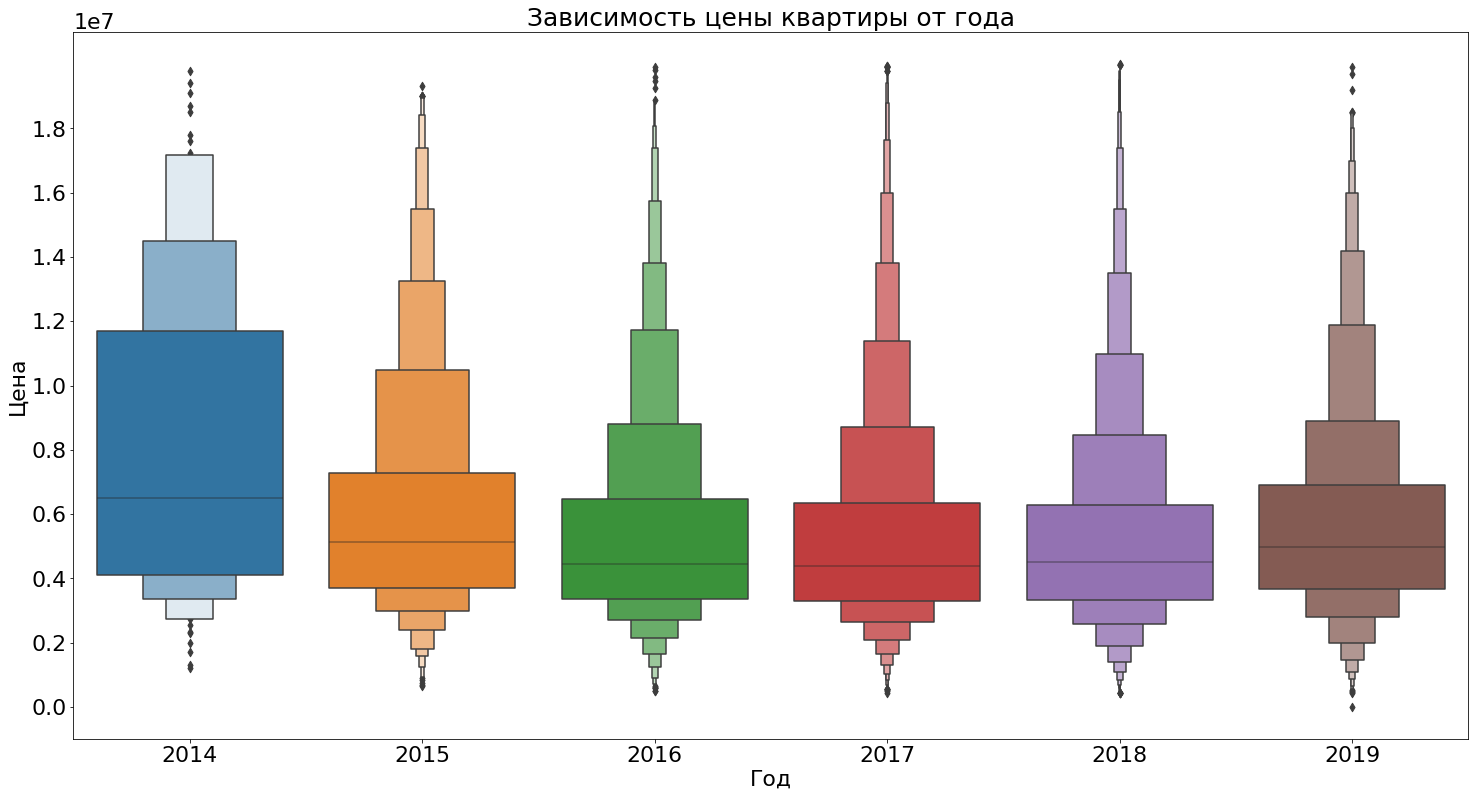

In [98]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

fig, ax = plt.subplots(figsize = (25,13))
sns.boxenplot(x = df.year, y = df.last_price)
ax.set_title("Зависимость цены квартиры от года", size = 25)
ax.set(xlabel="Год", ylabel="Цена")
plt.yticks(np.arange(0, 20e6, step = 2e6))

plt.show()


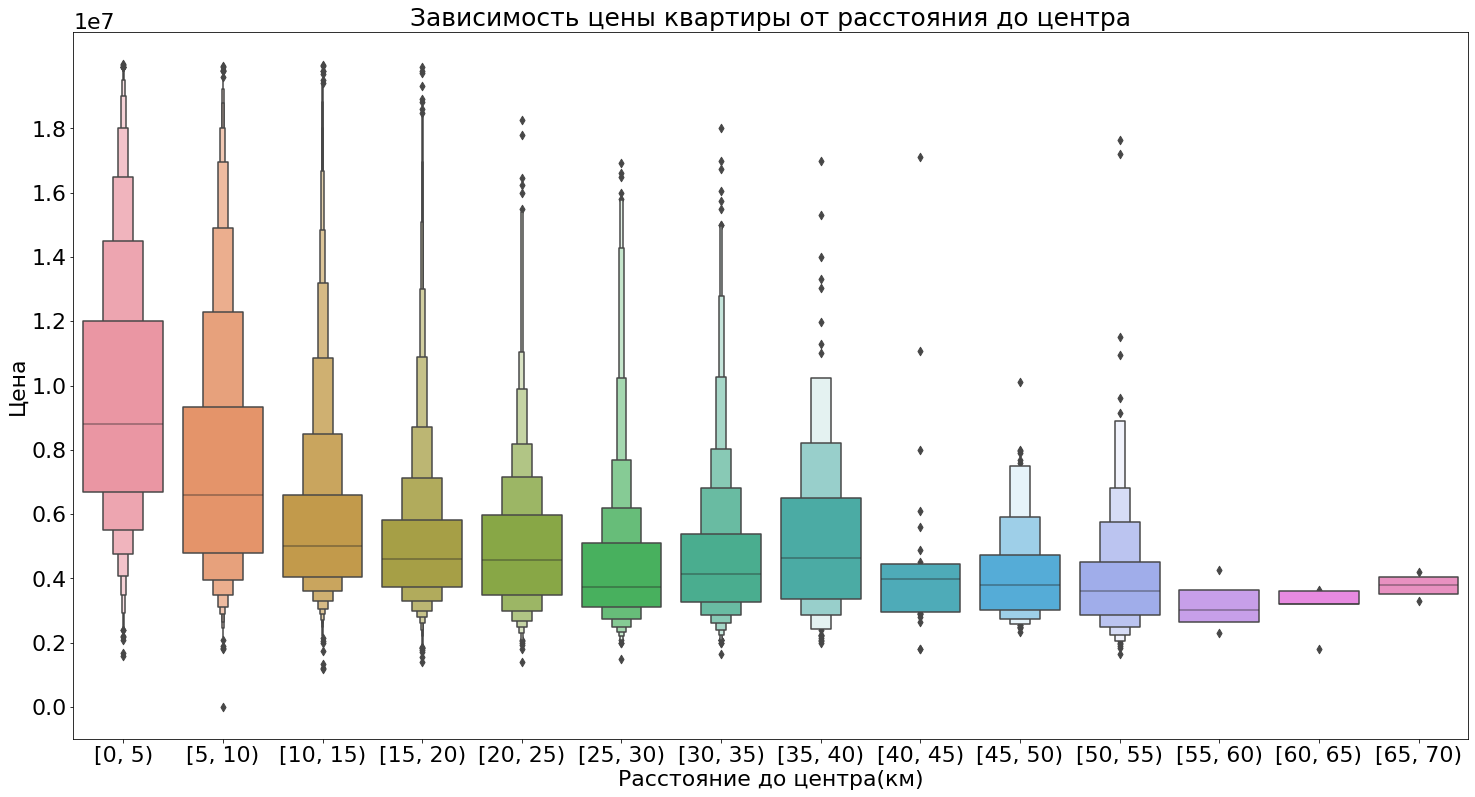

In [99]:
#Разобьем значения расстояния до центра на интервалы
#print(df.cityCenters_nearest.describe())
my_list = []
for i in range(0, 15):
    my_df = pd.DataFrame(df.query("cityCenters_nearest >= @i*5000 and cityCenters_nearest < (@i+1)*5000").last_price)
    
    my_df['distance2center_interval'] = '[' + str(i*5) + ', ' + str((i+1)*5) + ')'
    my_list.append(my_df)
    
result = pd.concat(my_list)

fig, ax = plt.subplots(figsize = (25,13))
sns.boxenplot(x = result.distance2center_interval, y = result.last_price)
ax.set_title("Зависимость цены квартиры от расстояния до центра", size = 25)
ax.set(xlabel="Расстояние до центра(км)", ylabel="Цена")
plt.yticks(np.arange(0, 20e6, step = 2e6))

plt.show()

In [100]:
#нужно избавиться от пустых значений в столбце floors_total
df.dropna(subset = ['floors_total'], inplace = True)

def find_floor(line):
    total_floors = line['floors_total']
    floor = line['floor']
    
    if floor == total_floors:
        return 'Последний'
    elif floor == 1:
        return 'Первый'
    else:
        return 'Другой'

df['floor_type'] = df.apply(find_floor,axis=1)
df['floor_type'].unique()

df.head(5)

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,year,floor_type
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,16028.0,NaN,2019,Другой
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,18603.0,81.0,2018,Первый
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,13933.0,558.0,2015,Другой
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,8098.0,121.0,2018,Другой
5,5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,55.0,2018,Другой


            last_price
floor_type            
Другой       4750000.0
Первый       3900000.0
Последний    4200000.0


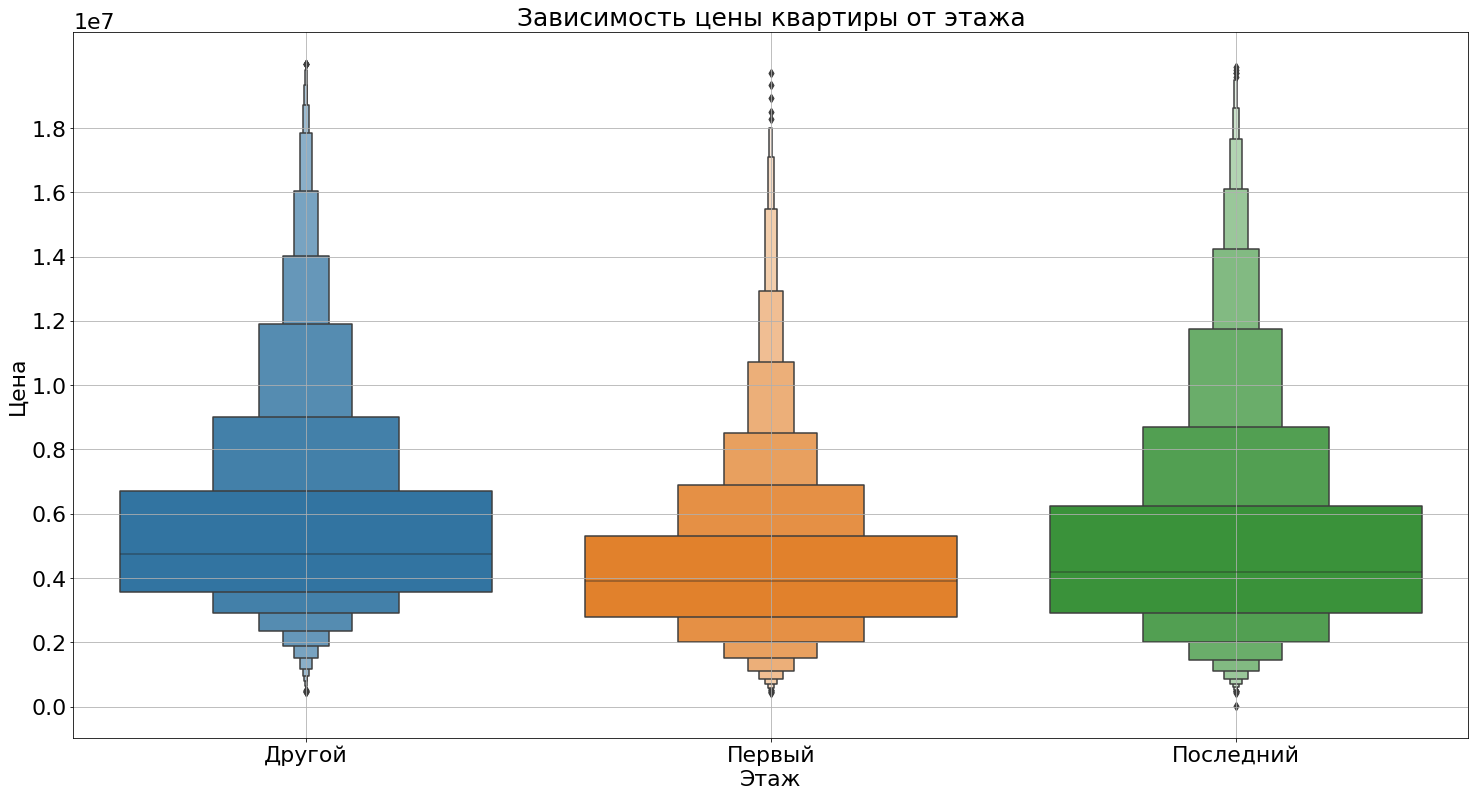

In [101]:
fig, ax = plt.subplots(figsize = (25,13))
sns.boxenplot(x = df.floor_type, y = df.last_price)
ax.set_title("Зависимость цены квартиры от этажа", size = 25)
ax.grid(1)
ax.set(xlabel="Этаж", ylabel="Цена")
plt.yticks(np.arange(0, 20e6, step = 2e6))
df_floor=df.pivot_table(index= 'floor_type', values = 'last_price', aggfunc = 'median')
print(df_floor)
plt.show()

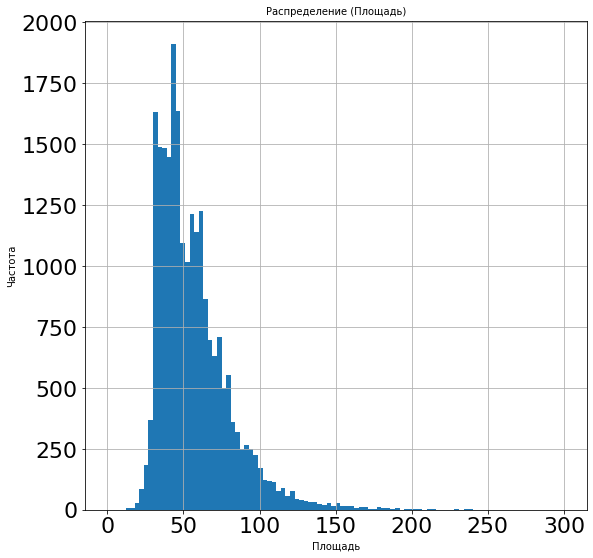

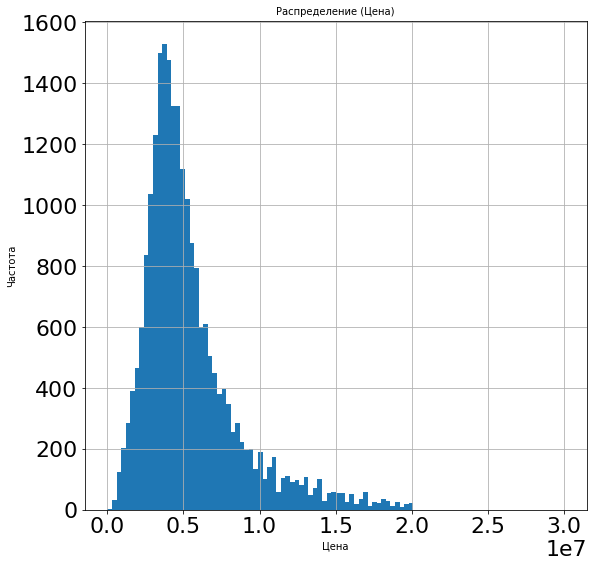

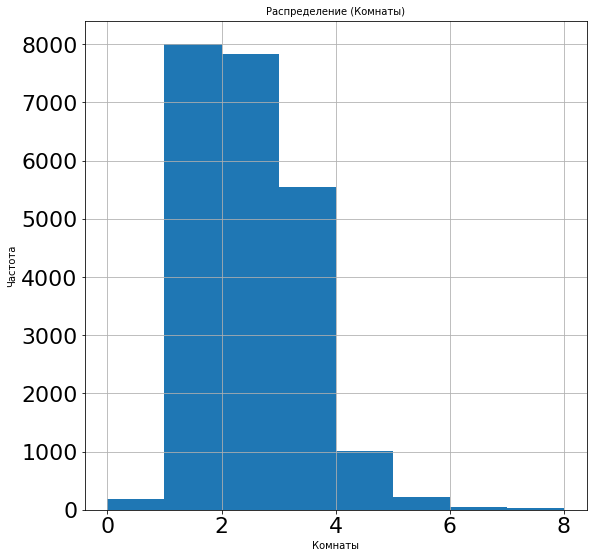

In [102]:
df_names=['total_area','last_price','rooms']
df_bins=[100,100,8,15]
df_ranges=[(0,300),(0,30e6),(0,8)]
df_xlabel=['Площадь','Цена','Комнаты']
i=0
for row in df_names:
    #print(i+1,')',df_xlabel[i])
    total_area_df=df[row].hist(bins=df_bins[i],range=df_ranges[i], figsize = (9,9))
    #print(df[row].describe())
    plt.xlabel(df_xlabel[i],fontsize= 10)
    plt.ylabel("Частота",fontsize= 10)
    plt.title("Распределение (" + df_xlabel[i] + ")",fontsize= 10)
    plt.show()
    i+=1

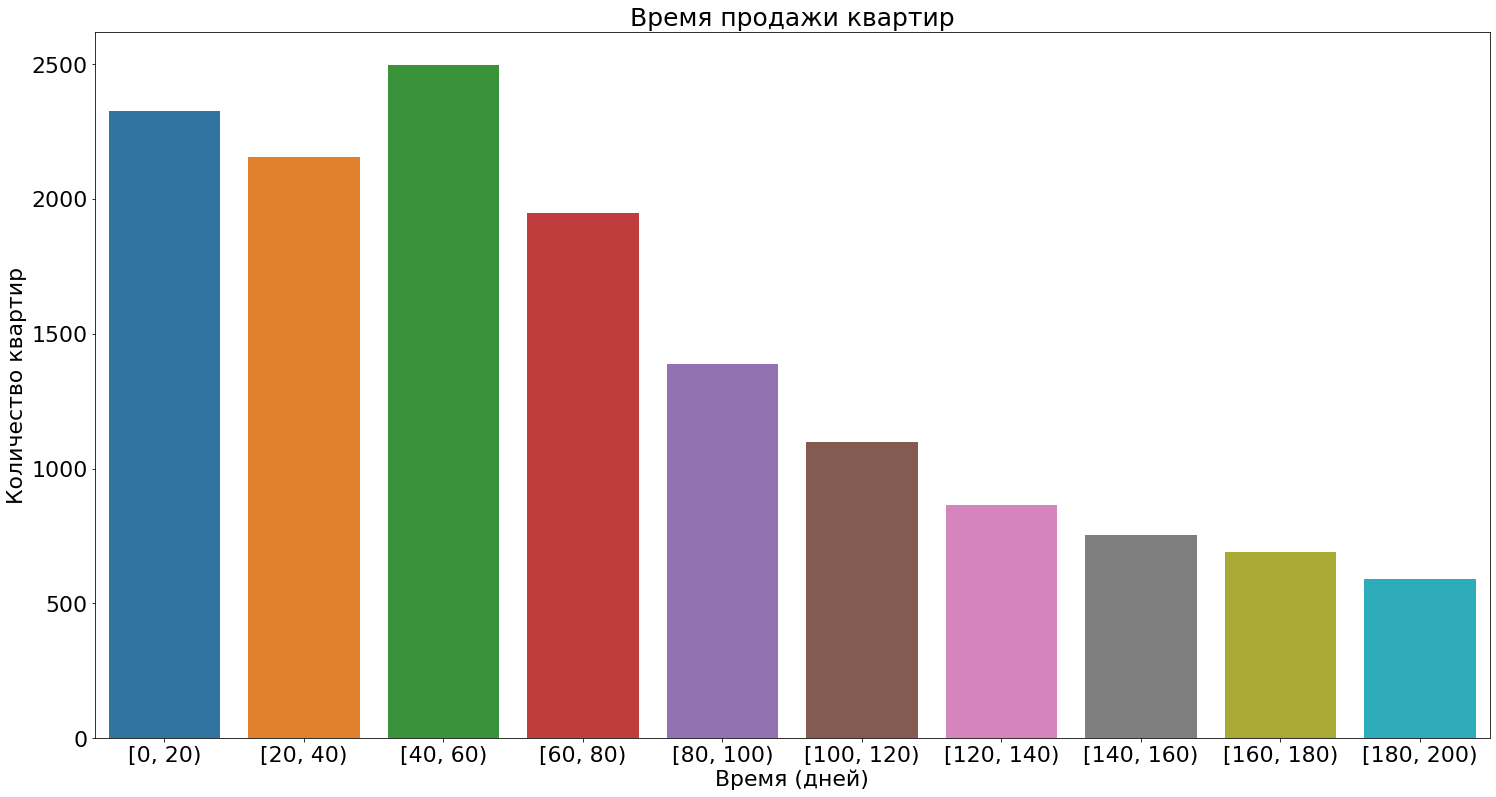

In [103]:
df.dropna(subset = ['days_exposition'], inplace = True)

my_list = []
for i in range(0, 10):
    number_of_flats = len(df.query("days_exposition >= @i*20 and days_exposition < (@i+1)*20"))
    my_list.append(['[' + str(i*20) + ', ' + str((i+1)*20) + ')' , number_of_flats])
    
result = pd.DataFrame(my_list, columns=['days_interval', 'number_of_flats'])    

fig, ax = plt.subplots(figsize = (25,13))
sns.barplot(x = result.days_interval, y = result.number_of_flats)
ax.set_title("Время продажи квартир", size = 25)
ax.set(xlabel="Время (дней)", ylabel="Количество квартир")
plt.show()


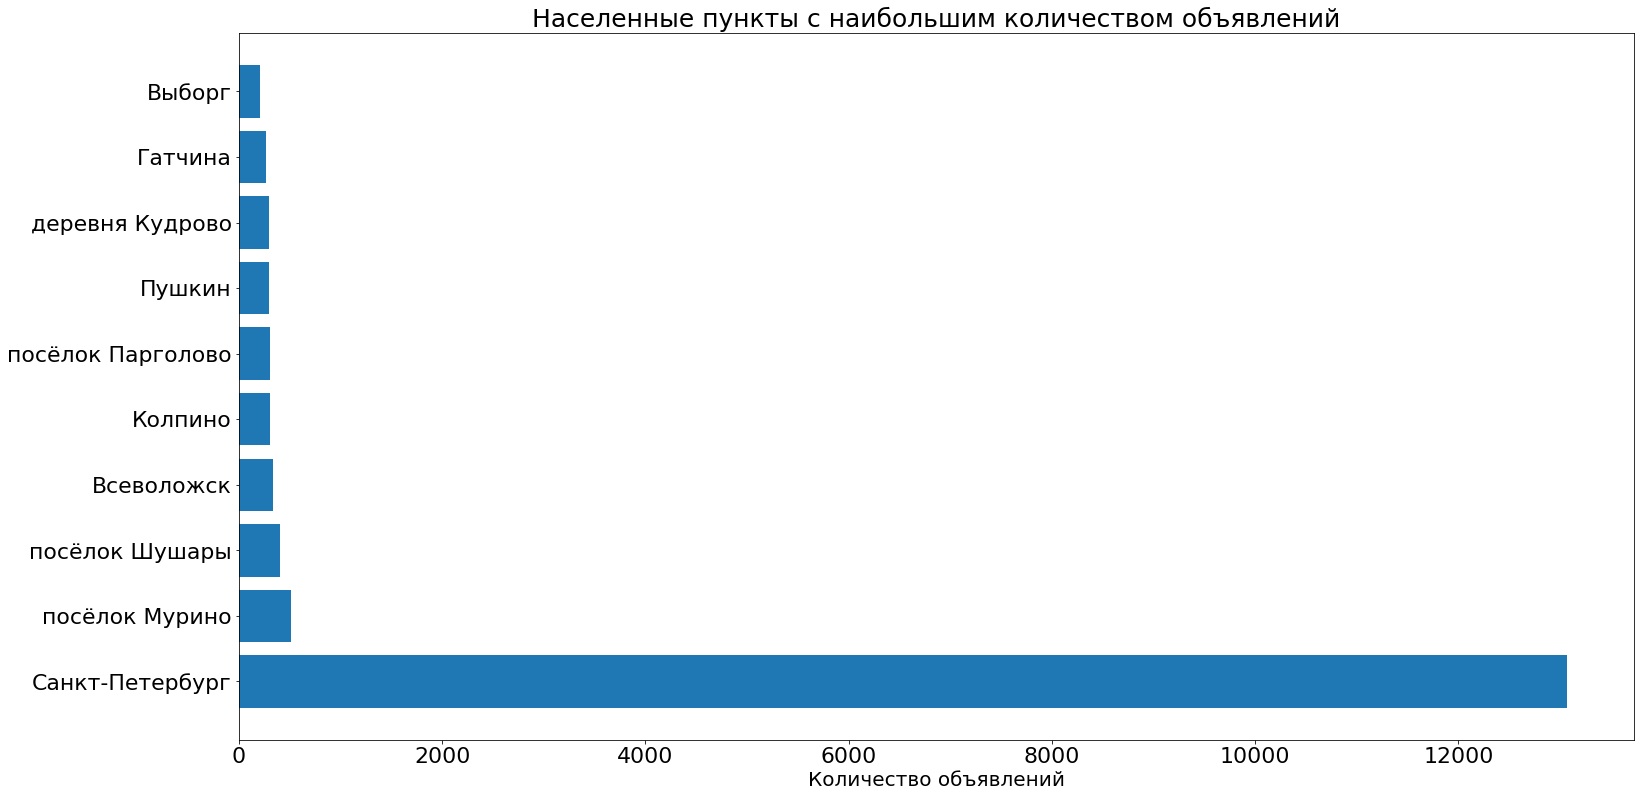

In [104]:
top_ten=df.locality_name.value_counts().head(10)

fig, ax = plt.subplots(figsize = (25,13))
ax.barh(top_ten.index, top_ten)
ax.set_xlabel("Количество объявлений", size = 20)
ax.set_title("Населенные пункты с наибольшим количеством объявлений", size = 25)
plt.show()

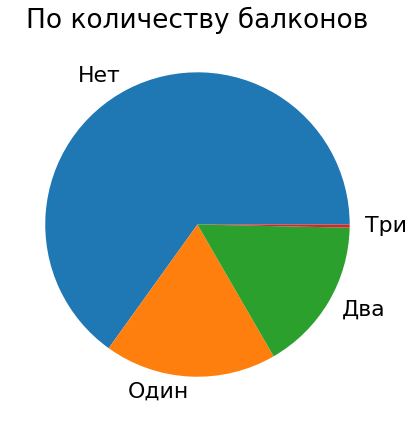

In [105]:
df.loc[df.balcony.isnull(),'balcony'] = 0

zero_b = len(df.query("balcony == 0"))
one_b = len(df.query("balcony == 1"))
two_b = len(df.query("balcony == 2"))
three_b = len(df.query("balcony == 3"))

# Creating dataset
number_of_balkonies = ['Нет', 'Один', 'Два', 'Три']
 
data = [zero_b, one_b, two_b, three_b]
 

fig, ax = plt.subplots(figsize =(10, 7))
plt.title('По количеству балконов')
plt.pie(data, labels = number_of_balkonies)

 
plt.show()


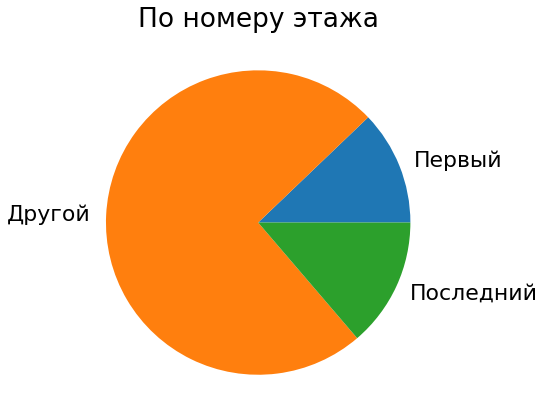

In [106]:
first = len(df.query("floor_type == 'Первый'"))
another = len(df.query("floor_type == 'Другой'"))
last = len(df.query("floor_type == 'Последний'"))

# Creating dataset
floors = ['Первый', 'Другой', 'Последний']
data = [first, another, last]
 
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('По номеру этажа')
plt.pie(data, labels = floors)
 
plt.show()

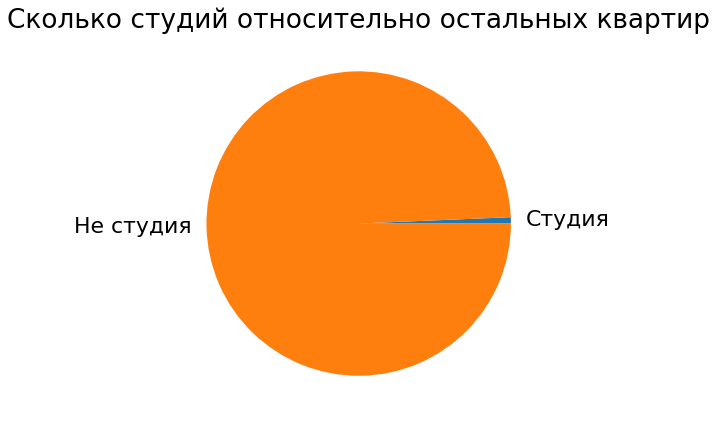

In [107]:
studio = len(df.query("studio == True"))
not_studio = len(df.query("studio == False"))

# Creating dataset
type = ['Студия', 'Не студия']
data = [studio, not_studio]
 
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Сколько студий относительно остальных квартир')
plt.pie(data, labels = type)
 
plt.show()